In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [2]:
data = pd.read_csv('train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data = data[~data['Age'].isna()]

In [4]:
feature = data.drop(columns = ['PassengerId', 'Name', 'Ticket'])
label = data['Survived']

In [5]:
feature.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
df_onehot = pd.get_dummies(feature[['Sex', 'Pclass', 'Embarked']])

In [7]:
df_f = pd.concat([feature, df_onehot], axis=1)
df_f

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,NaN,S,3,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,1,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,3,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,1,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,3,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,NaN,Q,3,1,0,0,1,0
886,0,2,male,27.0,0,0,13.0000,NaN,S,2,0,1,0,0,1
887,1,1,female,19.0,0,0,30.0000,B42,S,1,1,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,C148,C,1,0,1,1,0,0


In [8]:
df_f = df_f.drop(columns = ['Sex', 'Pclass', 'Embarked', 'Cabin'])
df_f.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1


In [9]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
Survived      714 non-null int64
Age           714 non-null float64
SibSp         714 non-null int64
Parch         714 non-null int64
Fare          714 non-null float64
Sex_female    714 non-null uint8
Sex_male      714 non-null uint8
Embarked_C    714 non-null uint8
Embarked_Q    714 non-null uint8
Embarked_S    714 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 37.0 KB


In [10]:
df_f.fillna(0)

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,1,0,0,1,0
886,0,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [11]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
Survived      714 non-null int64
Age           714 non-null float64
SibSp         714 non-null int64
Parch         714 non-null int64
Fare          714 non-null float64
Sex_female    714 non-null uint8
Sex_male      714 non-null uint8
Embarked_C    714 non-null uint8
Embarked_Q    714 non-null uint8
Embarked_S    714 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 37.0 KB


## Change df_f and label to tensor formate for pytorch

In [12]:
X = df_f.values[:,1:].astype('float32')
print(len(X))
X

714


array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [19.,  0.,  0., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]], dtype=float32)

In [13]:
y = df_f.values[:, 0].astype('float32')
y = y.reshape(len(y), 1)
print(len(y))
y

714


array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],

In [14]:
from sklearn.model_selection import train_test_split

# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
N, D = X_train.shape

In [15]:
print('N: ', N)
print('D: ', D)

N:  478
D:  9


In [16]:
# Scale the data
# you'll learn why scaling is needed in a later course
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train[0]

array([-0.40470913,  0.5690679 ,  1.9724817 ,  0.68905216,  1.3460181 ,
       -1.3460181 , -0.49148595, -0.21964884,  0.56929755], dtype=float32)

In [19]:
# Now all the fun PyTorch stuff
# Build the model
model = nn.Sequential(
    nn.Linear(D, 3),
    nn.Sigmoid(),
    nn.Linear(3, 1),
    nn.Sigmoid()
)

In [20]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [21]:
# Convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [22]:
# Train the model
n_epochs = 5000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

# lr = 1e-5

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)
    
  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()
    
  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

#   with torch.no_grad():
#     for param in model.parameters():
#         param -= lr * param.grad

Epoch 50/5000, Train Loss: 0.7236, Test Loss: 0.7052
Epoch 100/5000, Train Loss: 0.6942, Test Loss: 0.6861
Epoch 150/5000, Train Loss: 0.6717, Test Loss: 0.6727
Epoch 200/5000, Train Loss: 0.6542, Test Loss: 0.6630
Epoch 250/5000, Train Loss: 0.6401, Test Loss: 0.6557
Epoch 300/5000, Train Loss: 0.6280, Test Loss: 0.6494
Epoch 350/5000, Train Loss: 0.6170, Test Loss: 0.6434
Epoch 400/5000, Train Loss: 0.6068, Test Loss: 0.6371
Epoch 450/5000, Train Loss: 0.5970, Test Loss: 0.6303
Epoch 500/5000, Train Loss: 0.5876, Test Loss: 0.6231
Epoch 550/5000, Train Loss: 0.5784, Test Loss: 0.6155
Epoch 600/5000, Train Loss: 0.5696, Test Loss: 0.6080
Epoch 650/5000, Train Loss: 0.5611, Test Loss: 0.6005
Epoch 700/5000, Train Loss: 0.5530, Test Loss: 0.5933
Epoch 750/5000, Train Loss: 0.5454, Test Loss: 0.5864
Epoch 800/5000, Train Loss: 0.5381, Test Loss: 0.5799
Epoch 850/5000, Train Loss: 0.5314, Test Loss: 0.5738
Epoch 900/5000, Train Loss: 0.5250, Test Loss: 0.5681
Epoch 950/5000, Train Loss: 0

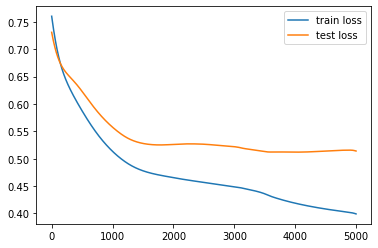

In [23]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [24]:
m = nn.Sigmoid()
input = torch.randn(2)
output = m(input)
print('Input: ', input)
print(output)

Input:  tensor([ 2.1141, -0.3073])
tensor([0.8923, 0.4238])


In [25]:
print(model.weight.shape)
model.weight

AttributeError: 'Sequential' object has no attribute 'weight'